In [1]:
import Simulation.pys.para.model_para as Mp
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import Simulation.pys.full_sim.dustlaw2extinction as D
import pickle as pkl
from importlib import reload
import Simulation.pys.para.initial_para as para
import healpy as hp

100%|██████████| 40/40 [00:01<00:00, 28.70it/s]


In [2]:
para_D = para.prior_dust_law()

In [3]:
para_D

{'infrared_a': array([0.57249761]),
 'infrared_b': array([-0.52489461]),
 'optical_a': array([ 1.00788305,  0.176594  , -0.50583497, -0.02397462,  0.72333287,
         0.02002164, -0.77235658,  0.33413275]),
 'optical_b': array([ 0.        ,  1.42550857,  2.29032165,  1.07821136, -5.40314273,
        -0.62228208,  5.37192766, -2.08778441])}

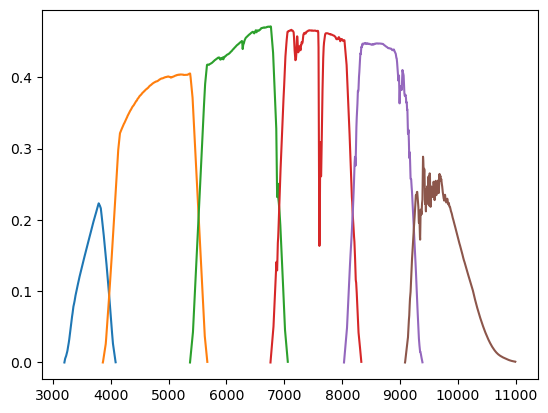

In [4]:
for item in "ugrizy":
    plt.plot(Mp.lsst_filter[item]["wl"], Mp.lsst_filter[item]["F_trans"])

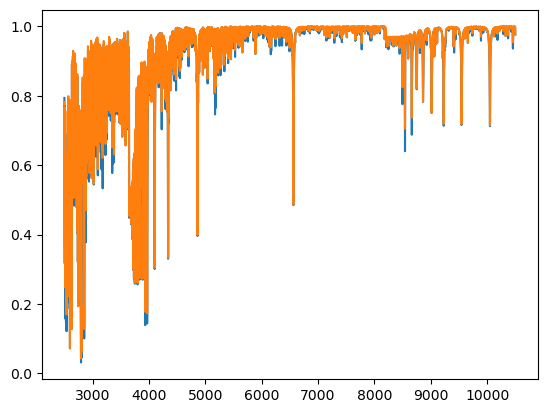

In [5]:
plt.plot(Mp.SED_wl, Mp.SED1)
plt.plot(Mp.SED_wl, Mp.SED2)

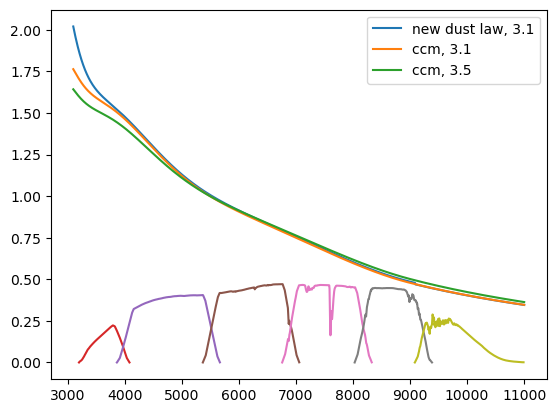

In [6]:
dl_ccm = D.dust_law(para.p_dust_law_0)



dl = D.dust_law(para_D)
test_wl = np.linspace(3100, 11000, 1000)* u.AA
x, AAv = dl.A_Av(test_wl)
plt.plot(test_wl , AAv, label = "new dust law, 3.1")

test_wl = np.linspace(3100, 11000, 1000)* u.AA
x, AAv = dl_ccm.A_Av(test_wl)
plt.plot(test_wl , AAv, label ="ccm, 3.1")


"""Just for test"""
para_D_test = para.prior_dust_law()
dl = D.dust_law(para_D)
x, AAv_test = dl_ccm.A_Av(test_wl, Rv = 3.5)
plt.plot(test_wl , AAv_test, label = "ccm, 3.5")
plt.legend()
for item in "ugrizy":
    plt.plot(Mp.lsst_filter[item]["wl"], Mp.lsst_filter[item]["F_trans"])

In [7]:
para_D

{'infrared_a': array([0.57249761]),
 'infrared_b': array([-0.52489461]),
 'optical_a': array([ 1.00788305,  0.176594  , -0.50583497, -0.02397462,  0.72333287,
         0.02002164, -0.77235658,  0.33413275]),
 'optical_b': array([ 0.        ,  1.42550857,  2.29032165,  1.07821136, -5.40314273,
        -0.62228208,  5.37192766, -2.08778441])}

In [8]:
para.p_dust_law_0

{'infrared_a': array([0.574]),
 'infrared_b': array([-0.527]),
 'optical_a': array([ 1.     ,  0.17699, -0.50447, -0.02427,  0.72085,  0.01979,
        -0.7753 ,  0.32999]),
 'optical_b': array([ 0.     ,  1.41338,  2.28305,  1.07233, -5.38434, -0.62251,
         5.3026 , -2.09002])}

In [9]:
band_coefficient_31 = dl_ccm.band_coefficient_FixedRv(Mp.lsst_filter, Mp.SED_wl, Mp.SED1)

In [10]:
band_coefficient_31

{'u': np.float64(4.809133960165434),
 'g': np.float64(3.6606004475666687),
 'r': np.float64(2.694893416006993),
 'i': np.float64(2.061860534999632),
 'z': np.float64(1.5855899750601081),
 'y': np.float64(1.3139712978327884)}

In [11]:
band_coefficient_Rv = dl.band_coefficient_Rv(Mp.lsst_filter, Mp.SED_wl, Mp.SED2)

In [12]:
band_coefficient_Rv["u"](3.1)

array(4.91526349)

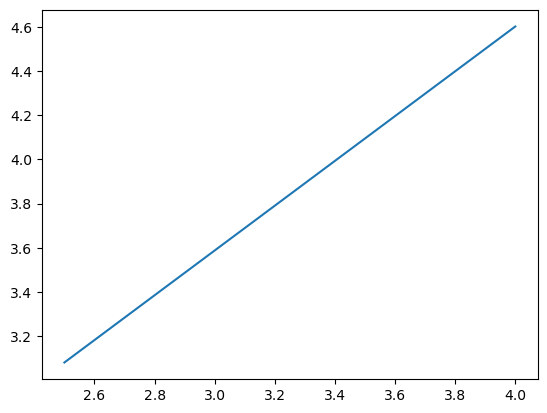

In [13]:
Rv = np.linspace(2.5, 4, 100)
plt.plot(Rv, band_coefficient_Rv["g"](Rv))

In [14]:
para_EBV = para.prior_EBV()
para_EBV

{'EBV_N1': 1.01554410195888,
 'EBV_N2': 1.0532755879080007,
 'EBV_mix': 0.380971288829441}

In [15]:
EBV_in = D.EBV_true(Mp.SFD, Mp.Planck, para_EBV)

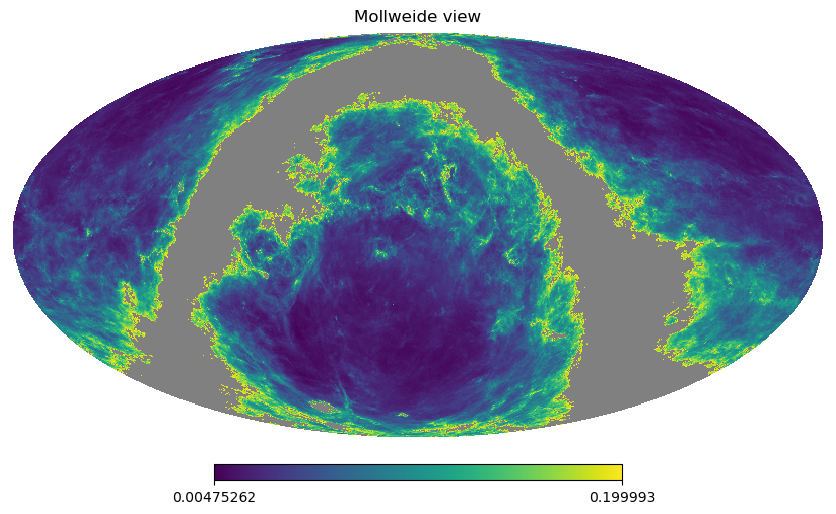

In [16]:
masked_EBV = EBV_in.copy()
mask = EBV_in > 0.2
masked_EBV[mask] = hp.UNSEEN
hp.mollview(masked_EBV)

In [17]:
len(mask)

3145728

In [18]:
para_Rv = para.prior_Rv()
para_Rv

{'Rv_a': 0.7310352581951177, 'Rv_b': 3.019008968190518, 'Rv_sig': 0.3}

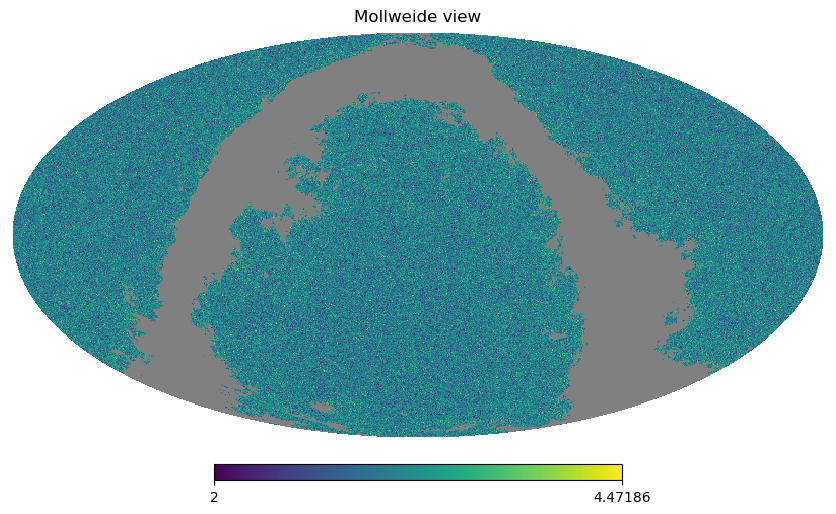

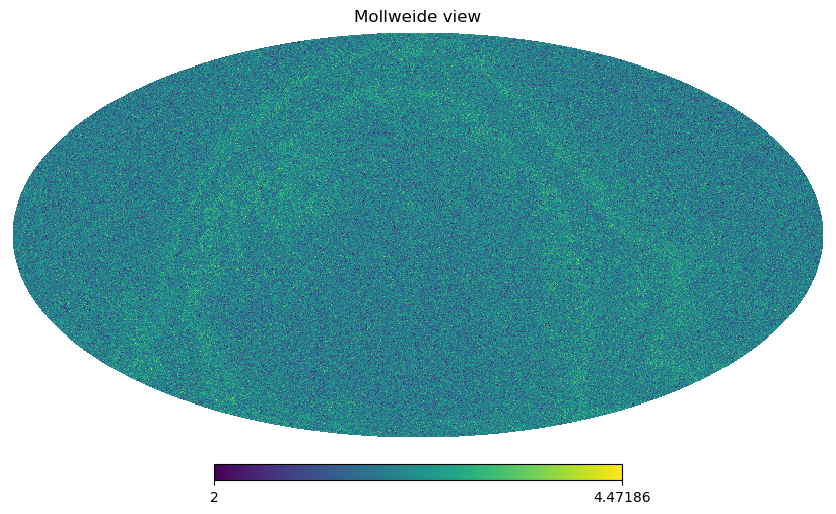

In [19]:
Rv_map = D.Rv_map(EBV_in, para_Rv)
masked_Rv = Rv_map.copy()
masked_Rv[mask] = hp.UNSEEN
hp.mollview(masked_Rv)
hp.mollview(Rv_map)

In [20]:
np.mean(Rv_map[mask])

np.float64(3.1540332696895885)

(0.0, 1.0)

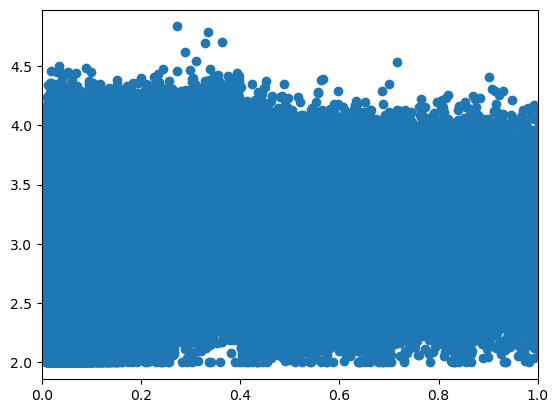

In [21]:
plt.scatter(EBV_in, Rv_map)
plt.xlim([0,1])

In [22]:
dust_pack = {"band_coefficient_ccm_31":band_coefficient_31,
              "band_coefficient_Rv": band_coefficient_Rv,
              "para_dust_law": para_D,
              "para_EBV": para_EBV,
             "para_Rv":para_Rv,
             "Rv_map":Rv_map,
              "EBV_in":EBV_in}

In [23]:
with open('../../data/test_model/test_dust_pack.pkl', 'wb') as f:
    pkl.dump(dust_pack, f)